In [1]:
# Team members: Vetle Tønsberg Johansen, Erik Fougner Arnesen, Sondre Trodahl

import pandas as pd
import numpy as  np
from scipy import stats
import datetime as dt
import matplotlib as plt

In [2]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'

In [3]:
df = pd.read_csv(url, sep=';')
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   TurId                                      6000 non-null   object
 1   Dato                                       6000 non-null   object
 2   Fylke                                      6000 non-null   object
 3   Område                                     6000 non-null   object
 4   Kommune                                    6000 non-null   object
 5   Holdeplass_Fra                             6000 non-null   object
 6   Holdeplass_Til                             6000 non-null   object
 7   Linjetype                                  6000 non-null   object
 8   Linjefylke                                 6000 non-null   object
 9   Linjenavn                                  6000 non-null   object
 10  Linjeretning                        

In [5]:
df.describe()
# Use .describe to see what we have to deal with. 
# Here we see that we have to deal with negative integers in "passengers onboard". These are outliers that we have to remove.

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,6000.000000,6000.000000,6000.000000
mean,0.492000,104.712167,4.512833
std,0.499978,24.225196,6.735730
min,0.000000,33.000000,-39.000000
25%,0.000000,80.000000,0.000000
50%,0.000000,106.000000,3.000000
75%,1.000000,112.000000,7.000000
max,1.000000,151.000000,64.000000


In [6]:
df['Passasjerer_Ombord'].value_counts() 
# Count how many types of "Passengers onbard" we have to deal with.
# We see that there are large single outliers like -34 and -39.
# There is most likley many more smaller negative outliers out there

 0     957
 1     590
 2     529
 3     445
 4     417
      ... 
 42      1
 40      1
-39      1
 35      1
-34      1
Name: Passasjerer_Ombord, Length: 70, dtype: int64

In [7]:
# Remove all outliers that are smaller then 0
df = df[df["Passasjerer_Ombord"] >= 0]

<AxesSubplot:xlabel='Klokkeslett', ylabel='Passasjerer_Ombord'>

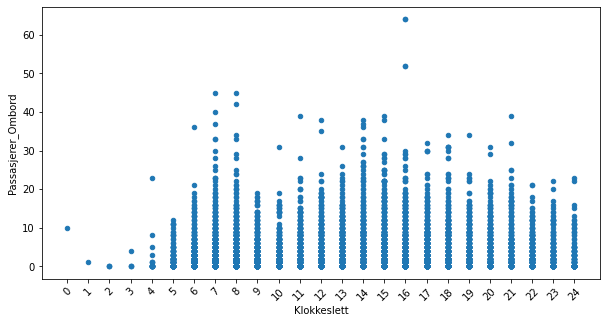

In [8]:
#Trying th make a graph of how many groups of passengers are boarding at any given time.  

df['Klokkeslett'] = df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'].str[:2]
#df.isna().sum() # Check NA values, ingen NA values å ta vekk
df["Klokkeslett"].value_counts()
# Vi har en feil hvor noen har klokkeslett satt til ":"
df = df[df["Klokkeslett"] != ":"]
df["Klokkeslett"].value_counts()
# Klokken 25 gir heller ikke mening
df = df[df["Klokkeslett"] != "25"]
df["Klokkeslett"].value_counts()
df['Passasjerer_Ombord'] = df['Passasjerer_Ombord'].astype(int)
df["Klokkeslett"] = df["Klokkeslett"].astype(int)
df.plot(x="Klokkeslett", y="Passasjerer_Ombord", kind= 'scatter', 
        xticks = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24], rot=45, figsize=(10,5))

<AxesSubplot:>

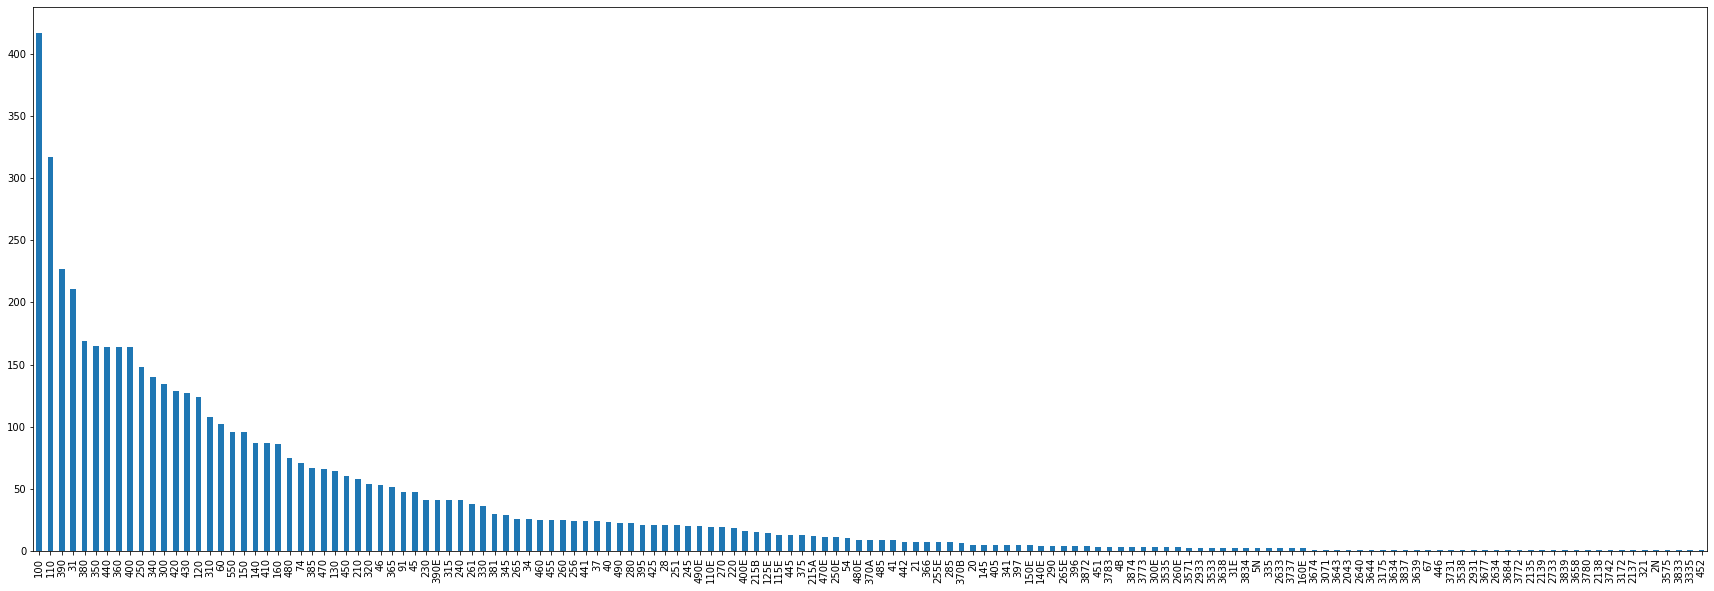

In [9]:
df['Linjenavn'].value_counts().plot(kind='bar', figsize =(30,10))
# Making a bar diagram that counts how many times a busslines is mentioned in the dataset.  

<AxesSubplot:>

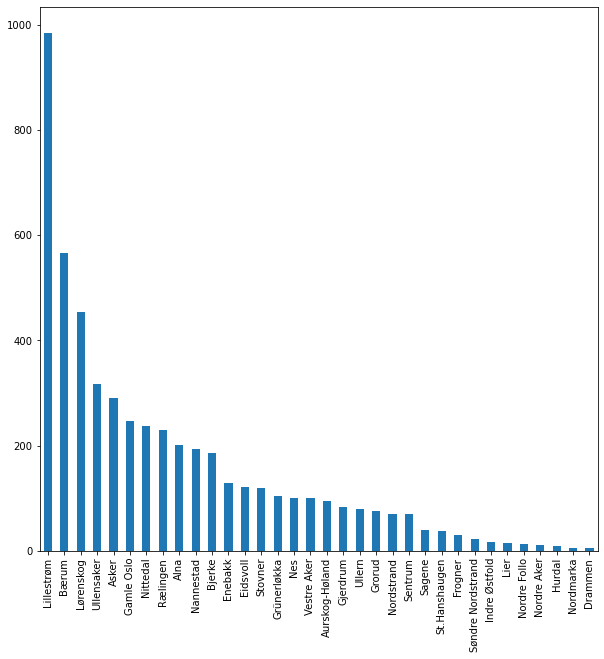

In [10]:
df['Kommune'].value_counts().plot(kind='bar', figsize =(10,10))
# Making a bar diagram that counts how many times a county is mentioned in the dataset.

<AxesSubplot:ylabel='Kommune'>

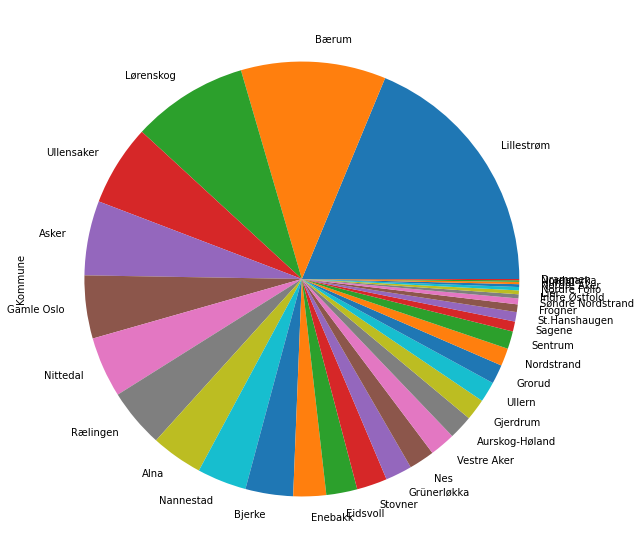

In [11]:
df['Kommune'].value_counts().plot(kind='pie', figsize =(10,10))
# A Pie diagram of the distribution of how many times a county is mentioned.

<AxesSubplot:>

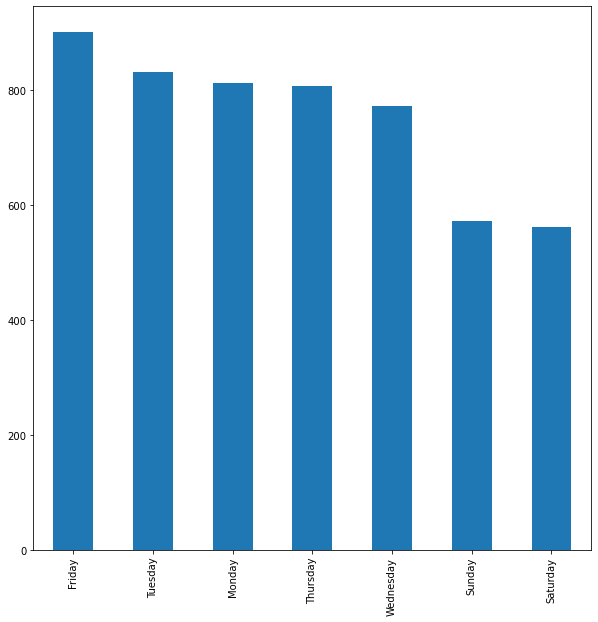

In [12]:
# Making a bar diagram that counts how many times which weekday has more Traffic.  
df['Dato']
df['Dato_av_tur'] = pd.to_datetime(df['Dato'])
df['dag_i_uke'] = df['Dato_av_tur'].dt.day_name()
df['dag_i_uke'].value_counts().plot(kind='bar', figsize =(10,10))

<AxesSubplot:>

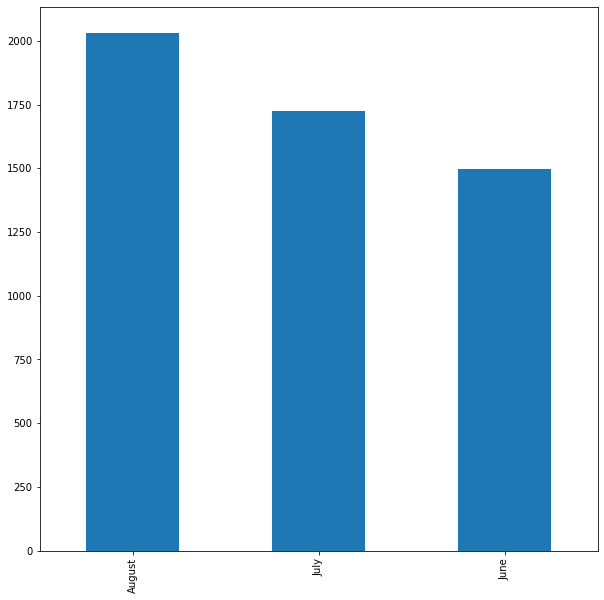

In [13]:
# Making a bar diagram that counts how many times which month has more Traffic.  
df['Tur_i_månende'] = pd.to_datetime(df.Dato, format='%d/%m/%Y').dt.month_name()
df['Tur_i_månende'].value_counts().plot(kind='bar', figsize =(10,10))

In [15]:
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], errors='coerce')
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], errors='coerce')
df["Time_delta"]=df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra']-df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']
df["Time_delta"]=df["Time_delta"].dt.total_seconds()

In [18]:
# Making a list with all conditions
conditions = [
    ((df['Time_delta'] >= 0.0) & (df['Time_delta'] <= 15.0)),   # 0 < t <= 15s
    (df['Time_delta'] > 15.0) & (df['Time_delta'] <= 30.0), # 15 < t <= 30s
    (df['Time_delta'] > 30.0) & (df['Time_delta'] <= 60.0), # 30 < t <= 60s
    (df['Time_delta'] > 60.0) & (df['Time_delta'] <= 300.0), # 60s < t <= 5min
    (df['Time_delta'] > 300) & (df['Time_delta'] <= 600.0),  # 5min < t <= 10min
    (df['Time_delta'] > 600.0)]                               # 10min < t 
    

# Creating a list of the values to assign for each condition
values = ['way_before_schedule', 'before_schedule', 'on_schedule', 'delayed', 'late', 'very_late']

# create a new column witch show buss status
df['Status'] = np.select(conditions, values)

<AxesSubplot:>

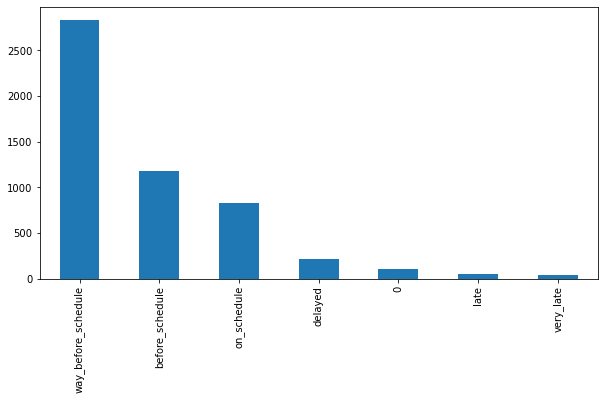

In [17]:
# Plotting a bar diagram witch shows how many routes are on and after schedule. 
# Deviation on the "0-bar", didn't find out where it came from. 
df["Status"].value_counts().plot(kind='bar', figsize = (10, 5))